## https://www.mikulskibartosz.name/monte-carlo-simulation-in-python/

In [2]:
RANDOM_STATE = 31415
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn


In [ ]:
seaborn.get_dataset_names()
dataset = seaborn.load_dataset('titanic')
# I want only the age column, but I don't want to deal with missing values
ages = dataset.age.dropna()

In [11]:
dataset = pd.read_csv('./data/titanic.csv')

In [13]:
ages = dataset.age.dropna()

## Uniform distribution

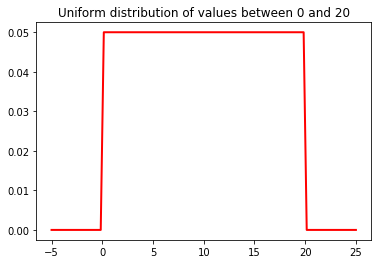

In [5]:
from scipy.stats import uniform
uniform_dist = uniform(loc = 0, scale = 20)

# rvs: random variables, 生成 size 个随机变量（符合当前分布的）
# 这里的结果，后续没有用
uniform_dist.rvs(size = 10, random_state = RANDOM_STATE)

# 为了画曲线，这里是自变量 x 的取值
x = np.linspace(-5, 25, 100)
_, ax = plt.subplots(1, 1)
ax.plot(x, uniform_dist.pdf(x), 'r-', lw = 2)
plt.title('Uniform distribution of values between 0 and 20')
plt.show()

In [6]:
uniform_dist.rvs(size = 10, random_state = RANDOM_STATE)

array([12.91637212, 13.5034834 , 19.41407972, 17.69608729, 18.18131685,
       16.47185933,  9.73419442, 12.41987159, 12.87024926,  8.00739132])

## Bernoulli distribution

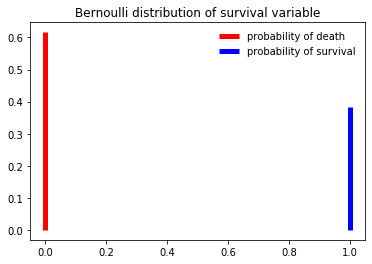

In [14]:
from scipy.stats import bernoulli
countSurvived = dataset[dataset.survived == 1].survived.count()
countAll = dataset.survived.count()

survived_dist = bernoulli(countSurvived / countAll)
# the given value is the probability of outcome 1 (survival) (let's call it p). 
# The probability of the opposite outcome (0 - death) is 1 - p.
_, ax = plt.subplots(1, 1)
ax.vlines(0, 0, survived_dist.pmf(0), colors='r', linestyles='-', lw=5, label="probability of death")
ax.vlines(1, 0, survived_dist.pmf(1), colors='b', linestyles='-', lw=5, label="probability of survival")
ax.legend(loc='best', frameon=False)
plt.title("Bernoulli distribution of survival variable")
plt.show()

## Discrete random variable

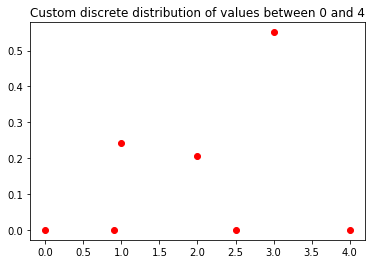

In [15]:
from scipy.stats import rv_discrete
pclass_probability = pd.DataFrame({'probability': dataset.groupby(by = "pclass", as_index=False).size() / dataset.pclass.count()}).reset_index()
values = pclass_probability.pclass
probabilities = pclass_probability.probability
custom_discrete_dist = rv_discrete(values=(values, probabilities))
x = [0, 0.9, 1, 2, 2.5, 3, 4]
_, ax = plt.subplots(1, 1)
ax.plot(x, custom_discrete_dist.pmf(x), 'ro', lw=2)
plt.title('Custom discrete distribution of values between 0 and 4')
plt.show()

## Normal random variable

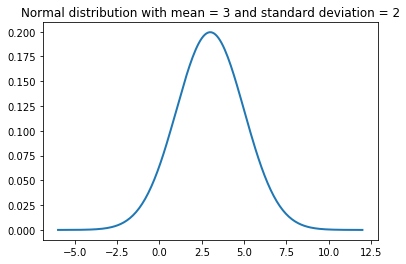

In [16]:
from scipy.stats import norm
mean = 3
standard_deviation = 2
normal_distribution = norm(loc = mean, scale = standard_deviation)
x = np.linspace(-6, 12, 200)
_, ax = plt.subplots(1, 1)
ax.plot(x, normal_distribution.pdf(x), '-', lw=2)
plt.title('Normal distribution with mean = 3 and standard deviation = 2')
plt.show()

## Gamma distribution

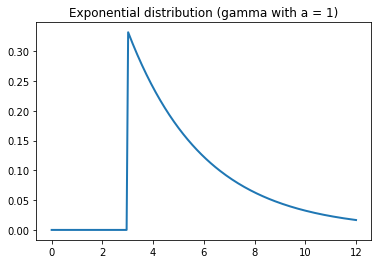

In [17]:
from scipy.stats import gamma
gamma_distribution = gamma(loc = 3, scale = 3, a = 1)
x = np.linspace(0, 12, 200)
_, ax = plt.subplots(1, 1)
ax.plot(x, gamma_distribution.pdf(x), '-', lw=2)
plt.title('Exponential distribution (gamma with a = 1)')
plt.show()

## probability mass function vs probability density function
+ mass: discrete
+ density: continue

In [21]:
def fit_and_plot(dist):
    # ages 的 histgram
    _, ax = plt.subplots(1, 1)
    plt.hist(ages, bins = 80, range=(0, 80))
    
    # fit 后，得到模型参数；再根据参数把模型的曲线画出来
    params = dist.fit(ages)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    
    # 模型参数得到后，自变量的取值
    x = np.linspace(0, 80, 80)
    
    ax2 = ax.twinx()
    ax2.plot(x, dist.pdf(x, loc=loc, scale=scale, *arg), '-', color = "r", lw=2)
    plt.show()
    return dist, loc, scale, arg

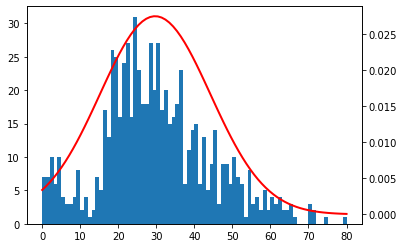

(<scipy.stats._continuous_distns.norm_gen at 0x11e0a1a10>,
 29.69911764705882,
 14.516321150817316,
 ())

In [22]:
fit_and_plot(norm)

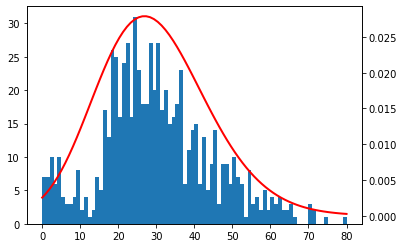

(<scipy.stats._continuous_distns.gamma_gen at 0x11e1bdad0>,
 -45.37307548137508,
 2.806622890786299,
 (26.748229688039117,))

In [20]:
fit_and_plot(gamma)

## Kolmogorov-Smirnov test
+ 检验数据是否符合某个模型，有 pvalue

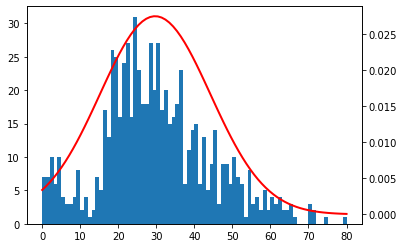

In [25]:
from scipy.stats import kstest
dist, loc, scale, arg = fit_and_plot(norm)
d, pvalue = kstest(ages.tolist(), lambda x: dist.cdf(x, loc = loc, scale = scale, *arg), alternative="two-sided")

In [27]:
pvalue

0.00496347192487969

In [28]:
def fit_and_plot_cdf(dist):
    params = dist.fit(ages)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    x = np.linspace(0, 80, 80)
    
    _, ax = plt.subplots(1, 1)
    counts, bin_edges = np.histogram(ages, bins=80, normed=True)
    
    cdf = np.cumsum(counts)
    plt.plot(bin_edges[1:], cdf)
    ax2 = ax.twinx()
    ax2.plot(x, dist.cdf(x, loc=loc, scale=scale, *arg), '-', color = "r", lw=2)
    plt.show()
    return dist, loc, scale, arg

/Users/ygzheng/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if __name__ == '__main__':


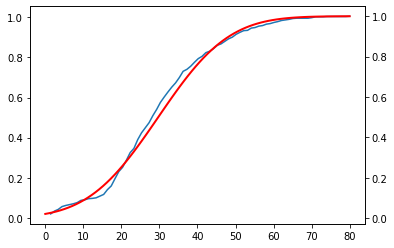

(<scipy.stats._continuous_distns.norm_gen at 0x11e0a1a10>,
 29.69911764705882,
 14.516321150817316,
 ())

In [29]:
fit_and_plot_cdf(norm)

### What do the 90% confidence interval and normal distribution mean? 
+ Your experts say that they are 90% sure, that the value will be somewhere between the lower and the upper bound. 
+ The mean value is the average between the upper bound and the lower bound, so in case of maintenance savings, mean= $15. Standard deviation is defined as (upper bound — lower bound) / 3.29. 
+ `3.29` standard deviations equal to 90% of values in normal distribution.

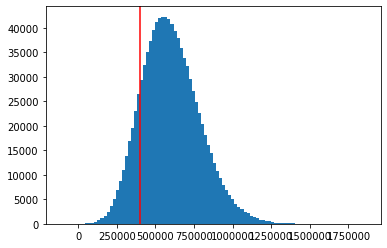

In [30]:
# 构建参数的模型
# 假设都是 norm，参数是：均值、标准差
_90_conf_interval = 3.29
maintenance = norm(loc = (20 + 10) / 2, scale = (20 - 10) / _90_conf_interval)
labor = norm(loc = (8 + -2) / 2, scale = (8 - -2) / _90_conf_interval)
raw_material = norm(loc = (9 + 3) / 2, scale = (9 - 3) / _90_conf_interval)
prod_level = norm(loc = (35000 + 15000) / 2, scale = (35000 - 15000) / _90_conf_interval)

# 模拟的次数
number_of_simulations = 1000000
maintenance_results = maintenance.rvs(number_of_simulations)
labor_results = labor.rvs(number_of_simulations)
raw_materials_results = raw_material.rvs(number_of_simulations)
prod_level_results = prod_level.rvs(number_of_simulations)

# 每一行是一次模拟
data = pd.DataFrame({
    "maintenance_savings_per_unit": maintenance_results,
    "labor_savings_per_unit": labor_results,
    "raw_materials_savings_per_unit": raw_materials_results,
    "production_level": prod_level_results
})
data["total_savings"] = (data.maintenance_savings_per_unit + data.labor_savings_per_unit + data.raw_materials_savings_per_unit) * data.production_level

plt.hist(data.total_savings, bins = 100)
plt.axvline(x = 400000, c = "r")
plt.show()

In [31]:
data[data["total_savings"] < 400000].count()["total_savings"] / 1000000

0.140642

## 3.29 是怎么来的？

In [36]:
# N(0, 1) 标准正态分布下，在 [-1, 1] 的概率是 68%
# 求：均值还是 0，但范围在 [-1, 1] 概率是 90% 对应的 标准差 是多少？ 

# 这里使用 cdf，不是 pdf
norm.cdf(1) - norm.cdf(-1)

0.6826894921370859

In [48]:
# 缩小 标准差，试出来的
znorm = norm(loc = 0, scale = 0.6075)
znorm.cdf(1) - znorm.cdf(-1)

0.9002548791701552

In [49]:
# 求出缩放因子：1,-1 对应 上下限
(1 - (-1)) / 0.6075

3.2921810699588474

In [58]:
norm.ppf(0.15865525)

-1.0000000162476559

In [57]:
norm.cdf(-1)

0.15865525393145707

In [59]:
norm.ppf(0.05) * 2

-3.2897072539029457

In [84]:
def getRatio(confidence): 
    """
    场景：有 90% 的把握结果在 80~90 之间
    模型假设：正态分布，
    模型参数：均值 85，标准差 未知，但需要满足 90% 的 confidence level
    """
    q = (1 - confidence) / 2
    return (-1) * norm.ppf(q) * 2

def getRatioTest(): 
    anorm = norm(loc=85, scale=(90-80)/getRatio(0.90))

    print("80-90 之间的概率：{:.2%} - {:.2%}".format(anorm.cdf(80), anorm.cdf(90)))

    print("5%-95% 对应的范围：{} - {}".format(anorm.ppf(0.05), anorm.ppf(0.95)))

In [85]:
getRatio(0.90)

3.2897072539029457

In [86]:
getRatioTest()

80-90 之间的概率：5.00% - 95.00%
5%-95% 对应的范围：80.0 - 90.0


# 另一个例子

### https://pythonprogramming.net/fixing-debt-issues-monte-carlo/?completed=/graphing-monte-carlo/

In [ ]:
import random
import matplotlib
import matplotlib.pyplot as plt


In [114]:
def rollDice():
    # let us go ahead and change this to return a simple win/loss
    # 50-100 不算两端，你赢，否则你输；
    # 尽管只有 1% 的差异，最终的结果会相距甚远
    
    roll = random.randint(1,100)

    if roll == 100:
        # print(roll,'in 100, you lose. What are the odds?! Play again!')
        return False
    elif roll <= 50:
        # print(roll,'in 1-50, you lose.')
        return False
    elif 100 > roll > 50:
        # print(roll,'in 51-99, you win! *pretty lights flash* (play more!)')
        return True

sampleSize = 100

startingFunds = 10000
wagerSize = 100
wagerCount = 1000

In [115]:
def simple_bettor(funds,initial_wager,wager_count, color):
    '''
    Simple bettor, betting the same amount each time.
    初始资金，每次的赌注，赌多少局
    '''
    
    global broke_count
    
    value = funds
    wager = initial_wager
    
    # wager X
    wX = []

    #value Y
    vY = []

    currentWager = 1
    while currentWager <= wager_count:
        if rollDice():
            value += wager
        else:
            value -= wager
            
        # append #
        wX.append(currentWager)
        vY.append(value)
        
        if value < 0:
            currentWager += 1000000000
            broke_count += 1    

        currentWager += 1

    plt.plot(wX,vY, color)
    

In [ ]:
x = 0
broke_count = 0
while x < 1000:             
    simple_bettor(10000,100,1000)
    x+=1
    
print(('death rate:',(broke_count/float(x)) * 100))
print(('survival rate:',100 - ((broke_count/float(x)) * 100)))
plt.axhline(0, color = 'r')
plt.ylabel('Account Value')
plt.xlabel('Wager Count')
plt.show()  

In [116]:
def doubler_bettor(funds,initial_wager,wager_count):
    global broke_count
    
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1

    # since we'll be betting based on previous bet outcome #
    previousWager = 'win'

    # since we'll be doubling #
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if rollDice():
                previousWager = 'win'
                value += wager
            else:
                previousWager = 'loss'
                value -= wager
                
                previousWagerAmount = wager
                
        elif previousWager == 'loss':
            wager = previousWagerAmount * 2
            
            if rollDice():
                previousWager = 'win'
                value += wager
            
                wager = initial_wager
            else:
                previousWager = 'loss'
                value -= wager
                
                previousWagerAmount = wager
                
        wX.append(currentWager)
        vY.append(value)   
        
        if value < 0:
            broke_count += 1
            # print('went broke after {} bets.'.format(currentWager))
            currentWager += 10000000
        
        currentWager += 1

    # print(value)
    plt.plot(wX,vY, 'c')

In [ ]:

xx = 0
broke_count = 0

while xx < 1000:             
    doubler_bettor(10000,100,100)
    xx+=1

#print 'death rate:',(broke_count/float(xx)) * 100
#print 'survival rate:',100 - ((broke_count/float(xx)) * 100)
plt.axhline(0, color = 'r')
plt.show()

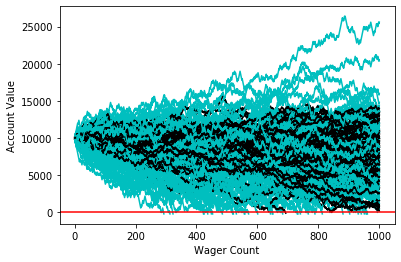

In [120]:
x = 0
broke_count = 0
while x < sampleSize:             
    simple_bettor(startingFunds,wagerSize,wagerCount,'k')
    simple_bettor(startingFunds,wagerSize*2,wagerCount,'c')
    # doubler_bettor(startingFunds,wagerSize,wagerCount)
    x+=1

plt.axhline(0, color = 'r')
plt.ylabel('Account Value')
plt.xlabel('Wager Count')
plt.show()